In [110]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

### Load Data

In [111]:
df=pd.read_csv(r'/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Describe Data

In [112]:
df.shape

(7043, 21)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [114]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Inference



*  Dataframe have 21 columns
*   Dataframe have 7043 rows
*   Total categorical columns are 18 columns
*   Total numerical columns are 3 columns
*   churn column is the target for this dataset





In [115]:
# finding missing values
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [116]:
# Handling Missing Values
print("\nHandling Missing Values...")
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna("Unknown", inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


Handling Missing Values...


Numerical columns: Replaced missing values with the column median.
Categorical columns: Replaced missing values with "Unknown".

In [117]:
#to find duplicate
df.duplicated().sum()

0

There are no duplicate values

In [118]:
# Univariate Analysis
print("\nUnivariate Analysis...")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts())
    else:
        print(f"\n{col} Statistics:")
        print(df[col].describe())


Univariate Analysis...

customerID Value Counts:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender Value Counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen Statistics:
count    7043.000000
mean        0.161863
std         0.368351
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

Partner Value Counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents Value Counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure Statistics:
count    7043.000000
mean       32.361352
std        24.538389
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

PhoneService Value Co

 Univariate Analysis:
Statistical summaries (mean, median, std, min, max) for numerical columns and frequency counts for categorical columns.

In [119]:

# Bivariate Analysis with target variable 'Churn'
target_col = "Churn"
if target_col in df.columns:
    print("\nBivariate Analysis...")
    for col in df.columns:
        if col != target_col:
            if df[col].dtype == "object":
                print(f"\n{col} vs {target_col}:")
                print(pd.crosstab(df[col], df[target_col]))
            else:
                print(f"\n{col} vs {target_col} Statistics:")
                print(df.groupby(target_col)[col].describe())


Bivariate Analysis...

customerID vs Churn:
Churn       No  Yes
customerID         
0002-ORFBO   1    0
0003-MKNFE   1    0
0004-TLHLJ   0    1
0011-IGKFF   0    1
0013-EXCHZ   0    1
...         ..  ...
9987-LUTYD   1    0
9992-RRAMN   0    1
9992-UJOEL   1    0
9993-LHIEB   1    0
9995-HOTOH   1    0

[7043 rows x 2 columns]

gender vs Churn:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

SeniorCitizen vs Churn Statistics:
        count      mean       std  min  25%  50%  75%  max
Churn                                                     
No     5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0
Yes    1869.0  0.253612  0.435194  0.0  0.0  0.0  1.0  1.0

Partner vs Churn:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

Dependents vs Churn:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

tenure vs Churn Statistics:
        count       mean        std  min   25%   50%   75%   max
C


--- Bivariate Analysis with Plotting ---


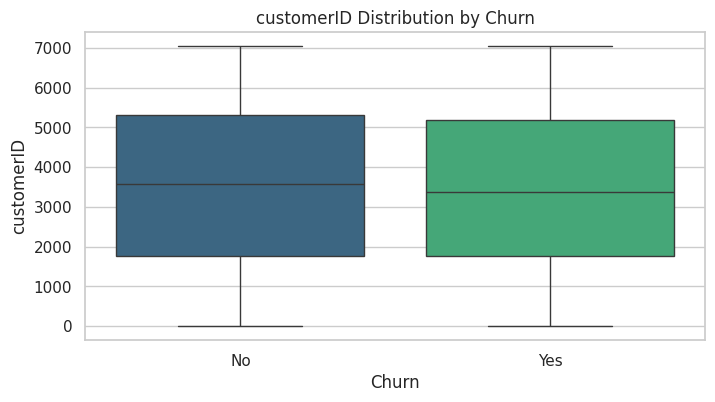

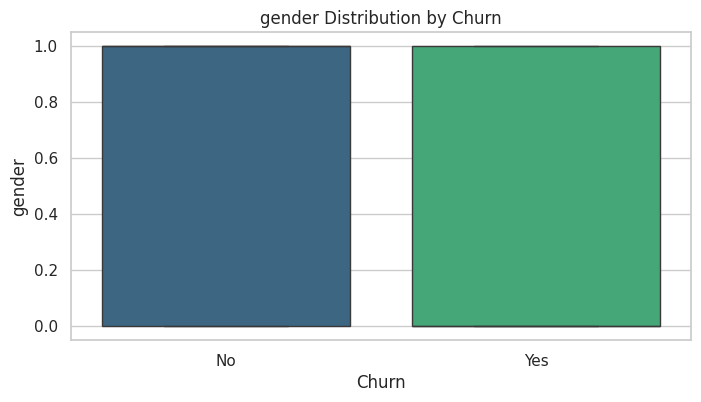

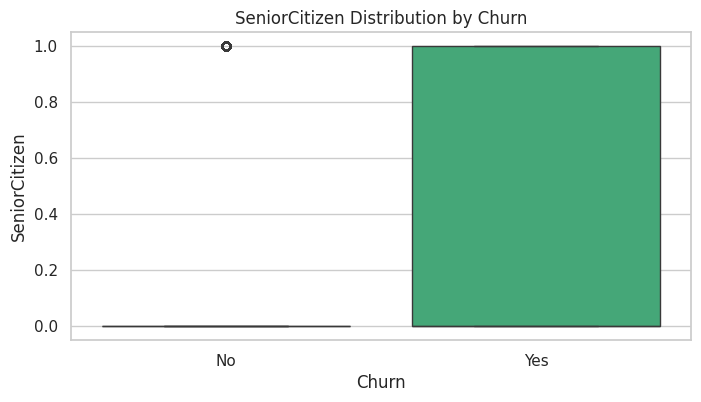

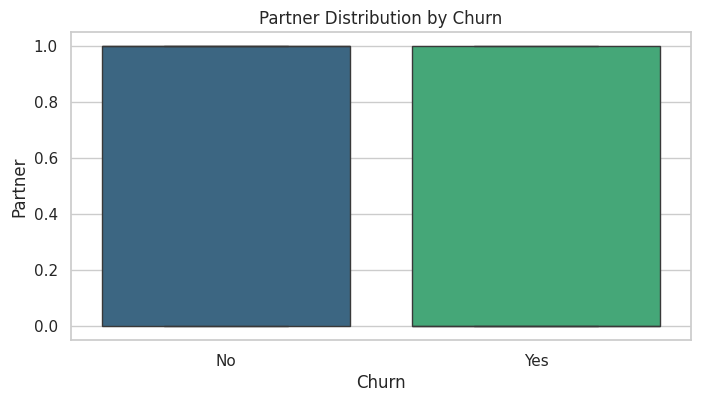

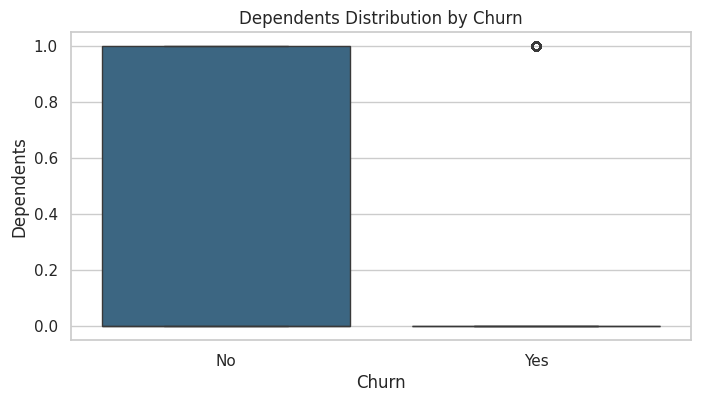

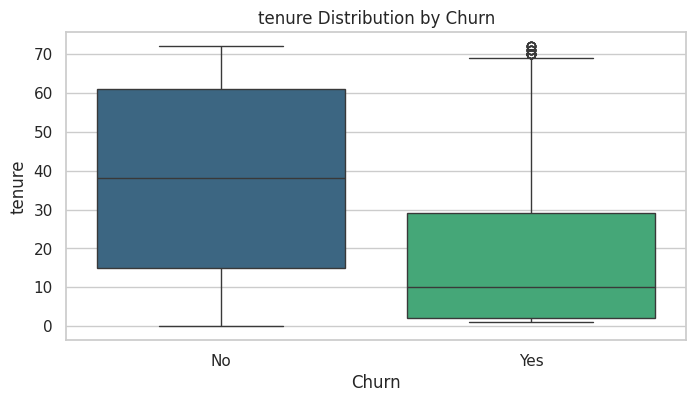

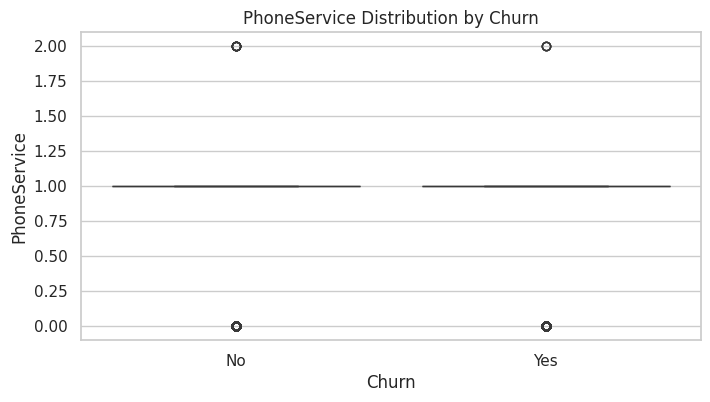

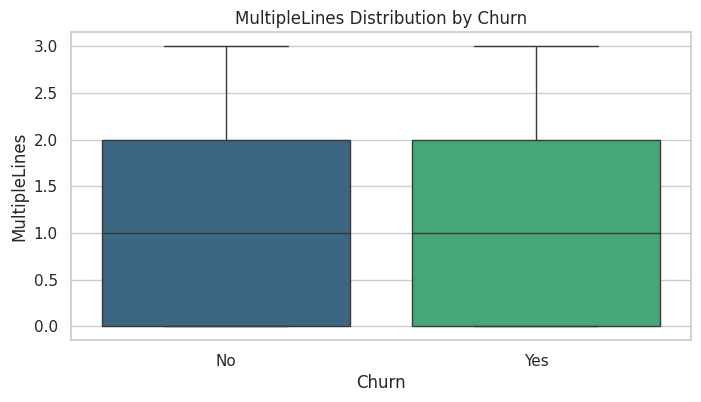

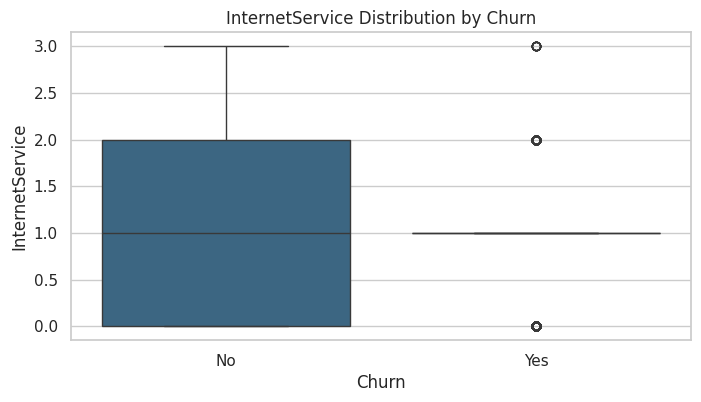

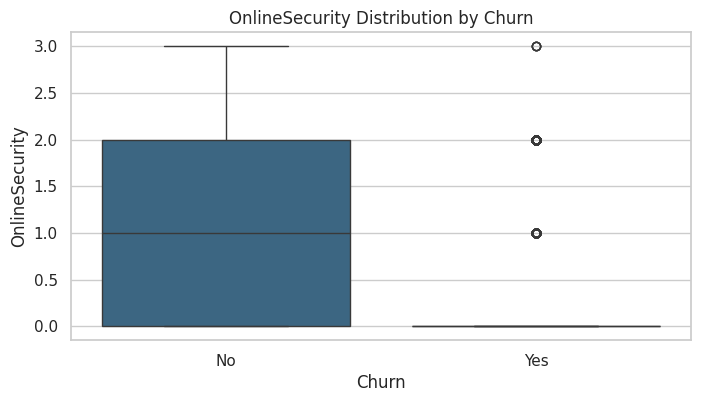

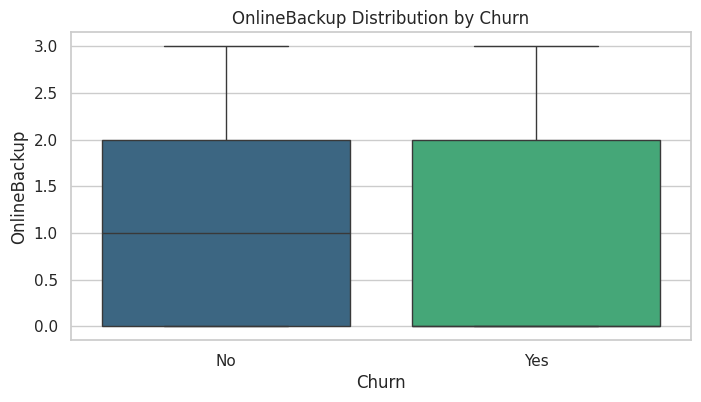

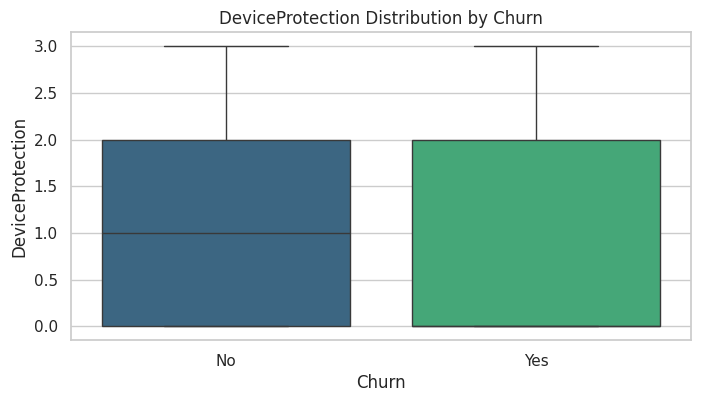

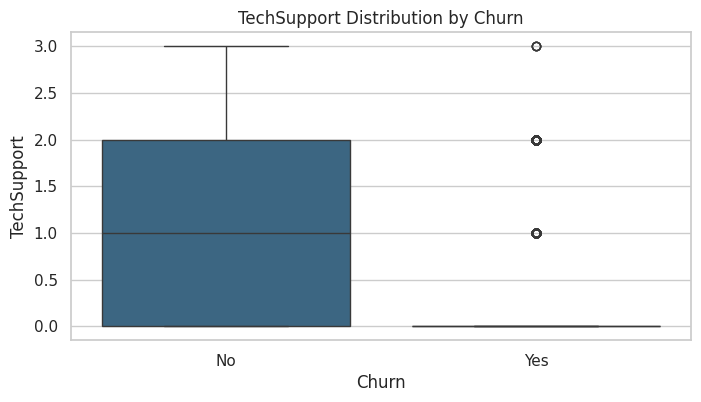

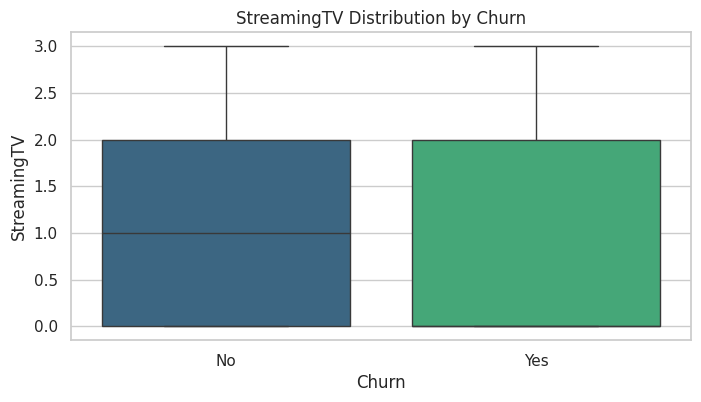

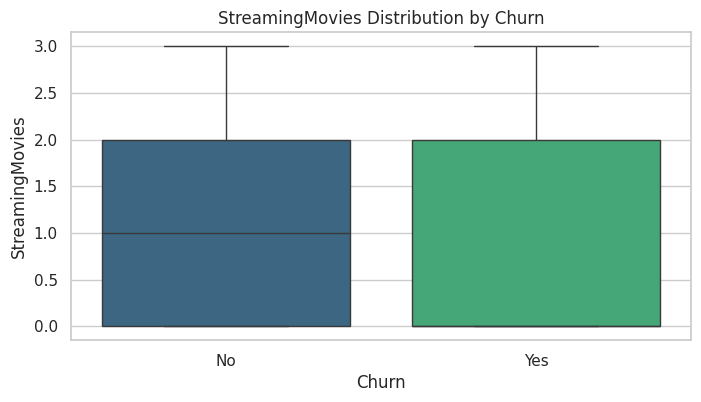

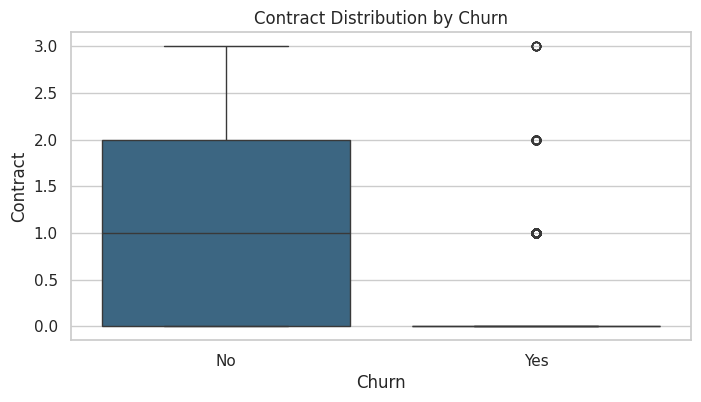

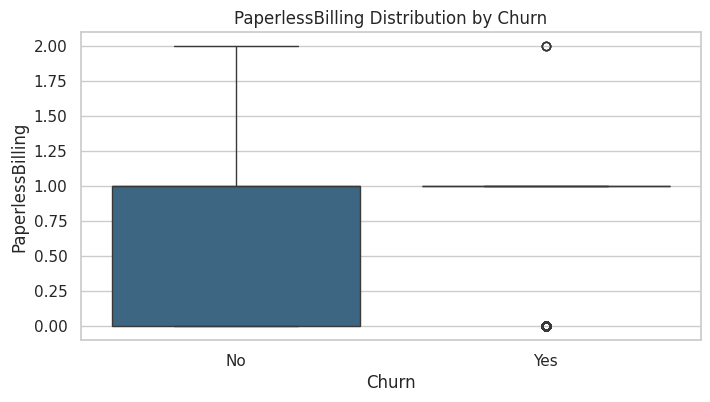

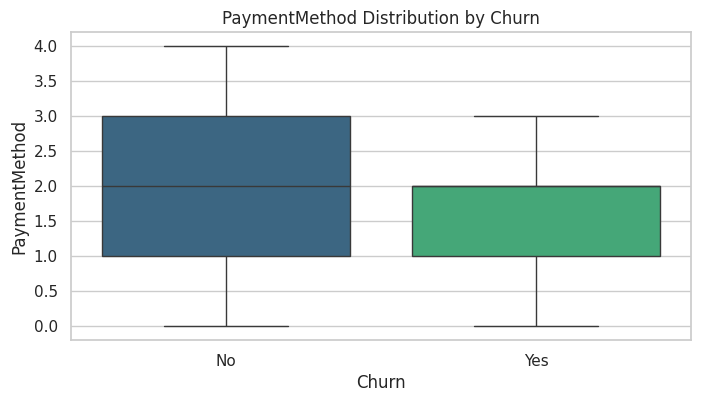

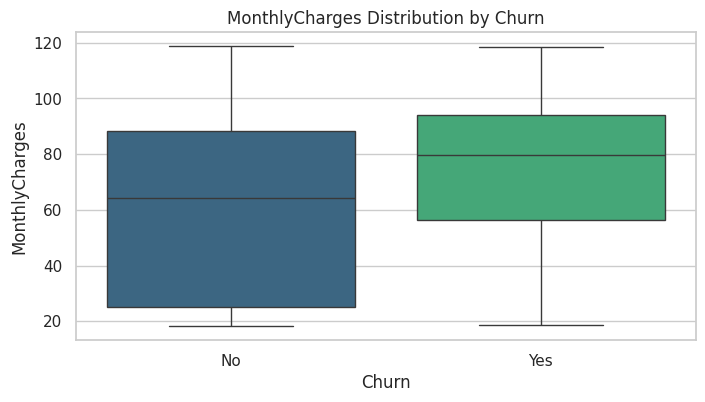

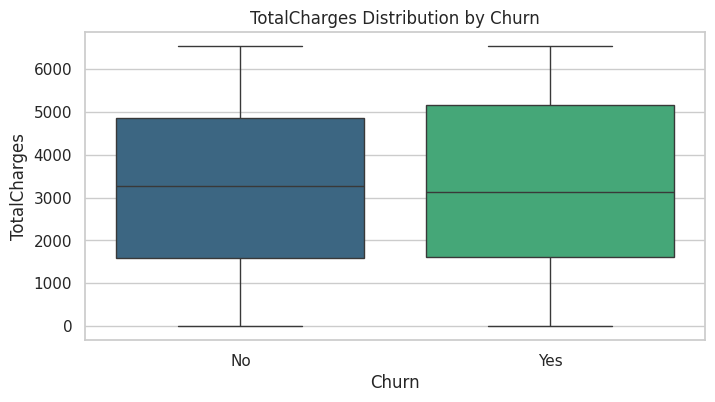

In [120]:

# Bivariate Analysis with Target Variable
def bivariate_analysis_plotting(data, target):
    print("\n--- Bivariate Analysis with Plotting ---")
    for column in data.columns:
        if column != target:
            plt.figure(figsize=(8, 4))
            if data[column].dtype in ["object", "category"]:
                sns.countplot(x=column, hue=target, data=data, palette="viridis")
                plt.title(f"{column} vs {target}")
                plt.xticks(rotation=45)
            else:
                sns.boxplot(x=target, y=column, data=data, palette="viridis")
                plt.title(f"{column} Distribution by {target}")
            plt.show()

# Perform Bivariate Analysis with Plotting
target_column = "Churn"
bivariate_analysis_plotting(data, target=target_column)

In [121]:
# Correlation Matrix for Multivariate Analysis
print("\nCorrelation Matrix:")

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

print(correlation_matrix)


Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.017974        0.220620
tenure               0.017974  1.000000        0.246352
MonthlyCharges       0.220620  0.246352        1.000000


### Feature Engineering

In [122]:
# Encode categorical variables
print("\nEncoding Categorical Variables:\n")
label_encoders = {}
target = "Churn"  # Define target here
for col in df.select_dtypes(include=['object']).columns:
    if col != target:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


Encoding Categorical Variables:



In [123]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0.0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,2,2,29.85,2503,No
1,3962,1,0.0,0,0,34.0,2,0,0,3,...,3,0,0,0,1,0,3,56.95,1464,No
2,2564,1,0.0,0,0,2.0,2,0,0,3,...,0,0,0,0,0,2,3,53.85,157,Yes
3,5535,1,0.0,0,0,45.0,0,1,0,3,...,3,3,0,0,1,0,0,42.30,1398,No
4,6511,0,0.0,0,0,2.0,2,0,1,0,...,0,0,0,0,0,2,2,70.70,924,Yes


In [124]:
df['customerID'].nunique()

7043

Since, customer ID column has all values unque, we are dropping that.


In [125]:
df.drop('customerID', axis=1, inplace=True)

In [126]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,3,0,0,0,0,0,2,2,29.85,2503,No
1,1,0.0,0,0,34.0,2,0,0,3,0,3,0,0,0,1,0,3,56.95,1464,No
2,1,0.0,0,0,2.0,2,0,0,3,3,0,0,0,0,0,2,3,53.85,157,Yes
3,1,0.0,0,0,45.0,0,1,0,3,0,3,3,0,0,1,0,0,42.30,1398,No
4,0,0.0,0,0,2.0,2,0,1,0,0,0,0,0,0,0,2,2,70.70,924,Yes


### Feature Selection

In [127]:
print("\nFeature Selection:\n")
X = df.drop(columns=['Churn'])
y = df['Churn']


Feature Selection:



In [128]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1.0,0,1,0,0,3,0,0,0,0,0,2,2,29.85,2503
1,1,0.0,0,0,34.0,2,0,0,3,0,3,0,0,0,1,0,3,56.95,1464
2,1,0.0,0,0,2.0,2,0,0,3,3,0,0,0,0,0,2,3,53.85,157
3,1,0.0,0,0,45.0,0,1,0,3,0,3,3,0,0,1,0,0,42.30,1398
4,0,0.0,0,0,2.0,2,0,1,0,0,0,0,0,0,0,2,2,70.70,924


In [129]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [130]:
# SelectKBest to find top features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges'],
      dtype='object')


### Model Selection

In [131]:
print("\nModel Selection and Prediction:\n")
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


Model Selection and Prediction:



In [132]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1.0,0,1,0,0,3,0,0,0,0,0,2,2,29.85,2503
1,1,0.0,0,0,34.0,2,0,0,3,0,3,0,0,0,1,0,3,56.95,1464
2,1,0.0,0,0,2.0,2,0,0,3,3,0,0,0,0,0,2,3,53.85,157
3,1,0.0,0,0,45.0,0,1,0,3,0,3,3,0,0,1,0,0,42.30,1398
4,0,0.0,0,0,2.0,2,0,1,0,0,0,0,0,0,0,2,2,70.70,924


In [134]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:\n")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:

[[916 120]
 [191 182]]

Classification Report:

              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Accuracy Score:

0.7792760823278921


###Model Selection with Multiple Algorithms

In [136]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [137]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    results[model_name] = accuracy


Training and evaluating Logistic Regression...
Accuracy: 0.8162
Confusion Matrix:
 [[942  94]
 [165 208]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Training and evaluating Random Forest...
Accuracy: 0.7793
Confusion Matrix:
 [[916 120]
 [191 182]]
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Training and evaluating Support Vector Machine...
Accuracy: 0.7999
Confusion Matrix:
 [[9

In [138]:
# Determine the best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Logistic Regression with Accuracy: 0.8162


In [139]:
# Save the best model
best_model = models[best_model_name]
import joblib
joblib.dump(best_model, f"{best_model_name.lower().replace(' ', '_')}_model.pkl")

['logistic_regression_model.pkl']

To reduce customer churn, focus on identifying at-risk customers early using the prediction model. Once identified, offer personalized retention strategies such as discounts, improved customer service, or upgraded services. Address the main reasons customers leave, like poor service or high pricing, and prioritize high-value customers to maximize the impact of your efforts. Keep monitoring the results and adjust your strategies as needed to continuously improve retention.